In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from pathlib import Path
import ot
import scipy as sp
import matplotlib.pyplot as plt
import utils
import accuracy


In [100]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import random

random.seed(10)

lcp = utils.LoadCloudPoint(filepath="datasets/csv_files/0005_Jogging001.csv")
source_pc, target_pc = lcp.get_two_random_point_cloud()

dp = utils.DistanceProfile(source_pc, target_pc)
distance_matrix = dp.compute_L2_matrix()

In [4]:
M = ot.dist(source_pc, target_pc)

In [5]:
G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1])

In [6]:
utils.plot_3d_points_and_connections(source_pc, target_pc, G, color_incorrect=True)

In [7]:
accs = []
alphas = np.arange(0, 1, 0.01)
for alpha in alphas:
    G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1], alpha=alpha)
    accs.append(accuracy.accuracy(G))

Text(0, 0.5, 'accuracy')

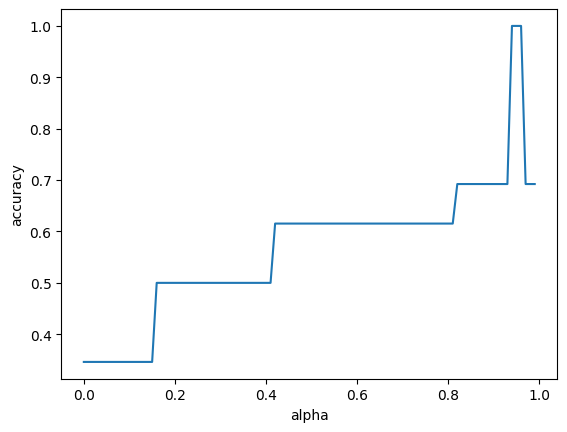

In [8]:
plt.plot(alphas,accs)
plt.xlabel("alpha")
plt.ylabel("accuracy")

In [9]:
lcp = utils.LoadCloudPoint(filepath="datasets/csv_files/0005_Jogging001.csv")

In [10]:
timestep = 50
source_pc, target_pc = lcp.get_pointclouds_fixed_timestep(timestep, fixed_beginning_idx=0)

dp = utils.DistanceProfile(source_pc, target_pc)
distance_matrix = dp.compute_L2_matrix()

In [11]:
M = ot.dist(source_pc, target_pc)
G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1])

In [12]:
accs = []
timestep_step = 20
num_timesteps = 50
alpha_step = 0.05
alphas = np.arange(0, 1 + alpha_step, alpha_step)
timesteps = np.arange(1, num_timesteps*timestep_step+1, timestep_step)
for timestep in timesteps:
    for alpha in alphas:
        source_pc, target_pc = lcp.get_pointclouds_fixed_timestep(timestep, fixed_beginning_idx=0)
        dp = utils.DistanceProfile(source_pc, target_pc)
        distance_matrix = dp.compute_L2_matrix()
        M = ot.dist(source_pc, target_pc)
        G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1], alpha=alpha)
        accs.append(accuracy.accuracy(G))

In [13]:
accs_stacked = np.array(accs).reshape(50, -1)

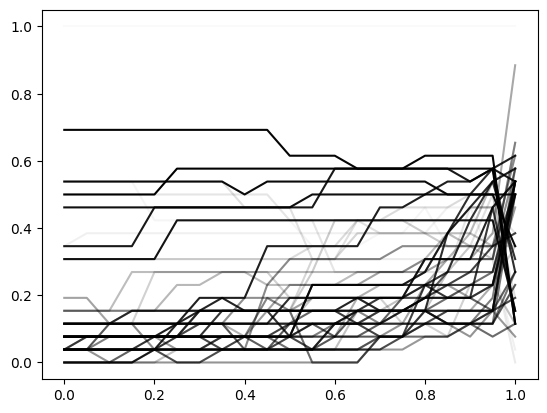

In [14]:
counter = 1
for acc_arr in accs_stacked:
    plt.plot(alphas, acc_arr, alpha = counter / accs_stacked.shape[0], c = "black")
    counter += 1

In [15]:
source_pc, target_pc = lcp.get_pointclouds_fixed_timestep(5, fixed_beginning_idx=0)
dp = utils.DistanceProfile(source_pc, target_pc)
distance_matrix = dp.compute_L2_matrix()
M = ot.dist(source_pc, target_pc)
G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1], alpha=0)
utils.plot_3d_points_and_connections(source_pc, target_pc, G)

In [16]:
G = ot.solve(ot.dist(source_pc, target_pc), np.ones(source_pc.shape[0])/ (source_pc.shape[0]), np.ones(target_pc.shape[0]) / target_pc.shape[0]).plan

In [17]:
np.mean(np.linalg.norm((np.linalg.inv(np.diag(np.sum(G, axis = 1))) @ G) @ target_pc - target_pc, axis = 1))

np.float64(212.07358122426143)

In [54]:
dist_accs = []
timestep_step = 1
num_timesteps = 300
alpha_step = 0.1
alphas = np.arange(0, 1 + alpha_step, alpha_step)
timesteps = np.arange(1, num_timesteps*timestep_step+1, timestep_step)
for timestep in timesteps:
    for alpha in alphas:
        source_pc, target_pc = lcp.get_pointclouds_fixed_timestep(timestep, fixed_beginning_idx=0)
        dp = utils.DistanceProfile(source_pc, target_pc)
        distance_matrix = dp.compute_L2_matrix()
        M = ot.dist(source_pc, target_pc)
        G = ot.fused_gromov_wasserstein(M, distance_matrix[0], distance_matrix[1], alpha=alpha)
        dist_accs.append(accuracy.dist_accuracy(source_pc, target_pc, G))
    print(f"finished timestep {timestep}")

finished timestep 1
finished timestep 2
finished timestep 3
finished timestep 4
finished timestep 5
finished timestep 6
finished timestep 7
finished timestep 8
finished timestep 9
finished timestep 10
finished timestep 11
finished timestep 12
finished timestep 13
finished timestep 14
finished timestep 15
finished timestep 16
finished timestep 17
finished timestep 18
finished timestep 19
finished timestep 20
finished timestep 21
finished timestep 22
finished timestep 23
finished timestep 24
finished timestep 25
finished timestep 26
finished timestep 27
finished timestep 28
finished timestep 29
finished timestep 30
finished timestep 31
finished timestep 32
finished timestep 33
finished timestep 34
finished timestep 35
finished timestep 36
finished timestep 37
finished timestep 38
finished timestep 39
finished timestep 40
finished timestep 41
finished timestep 42
finished timestep 43
finished timestep 44
finished timestep 45
finished timestep 46
finished timestep 47
finished timestep 48
f

In [55]:
dist_accs_stacked = np.array(dist_accs).reshape(num_timesteps, -1)

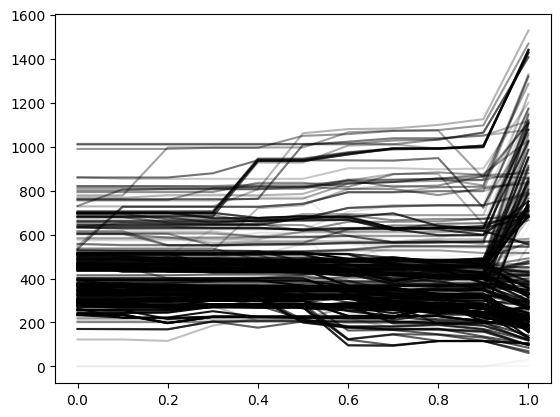

In [56]:
counter = 1
for acc_arr in dist_accs_stacked:
    plt.plot(alphas, acc_arr, alpha = counter / dist_accs_stacked.shape[0], c = "black")
    counter += 1

Text(0.5, 1.0, 'Regular Wasserstein (alpha = 0) vs. Gromow Wasserstein (alpha =1 )')

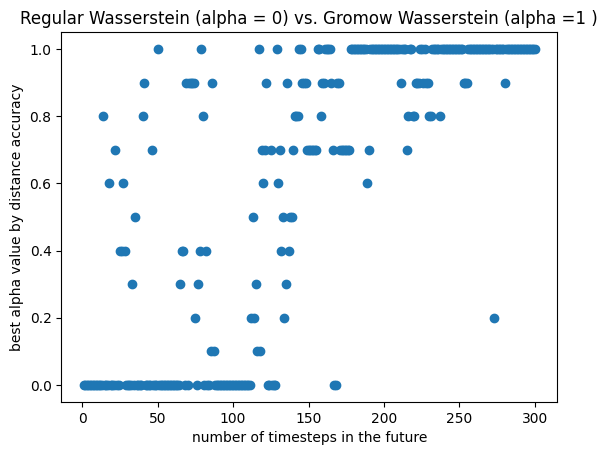

In [57]:
plt.scatter(timesteps, [alphas[x.argmin()] for x in dist_accs_stacked])
plt.xlabel("number of timesteps in the future")
plt.ylabel("best alpha value by distance accuracy")
plt.title("Regular Wasserstein (alpha = 0) vs. Gromow Wasserstein (alpha =1 )")

array([ 1.623648e+03,  2.562207e+03, -5.436400e+01,  1.561032e+03,
        2.728980e+03, -4.018900e+01,  1.562895e+03,  2.633810e+03,
        1.617750e+02,  1.184764e+03,  2.692918e+03,  1.457500e+01,
        1.133353e+03,  2.568540e+03,  2.951000e+00,  1.323044e+03,
        2.417342e+03,  1.149490e+02,  1.028551e+03,  2.476519e+03,
        1.358580e+02,  8.803920e+02,  2.595647e+03, -5.019200e+01,
        9.364400e+02,  2.618741e+03, -1.141010e+02,  8.316540e+02,
        2.813456e+03,  9.013500e+01,  1.348063e+03,  2.848627e+03,
        3.086840e+02,  1.139020e+03,  2.820724e+03,  3.639830e+02,
        9.135220e+02,  2.927936e+03,  2.372370e+02,  1.016574e+03,
        2.958958e+03,  2.314600e+02,  8.445260e+02,  0.000000e+00,
        0.000000e+00,  9.603240e+02,  2.569050e+03,  2.079400e+02,
        9.825230e+02,  2.669591e+03,  2.442780e+02,  9.952800e+02,
        2.596972e+03,  7.848600e+01,  4.460320e+02,  2.707448e+03,
        1.887650e+02,  3.519120e+02,  2.598011e+03,  4.083110e